In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/Users/ecuerbo/Desktop/data/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
#compute age
from datetime import datetime as dt
df['Age'] = df["Year_Birth"].apply(lambda x: dt.now().year-x)
df["Age"].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [10]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

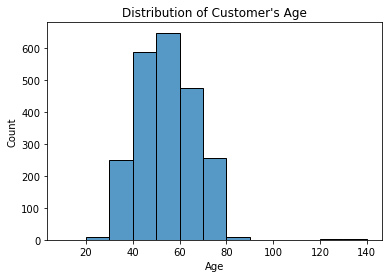

In [11]:
#univariate analysis
sns.histplot(data=df,x='Age', bins=list(range(10,150,10)))
plt.title("Distribution of Customer's Age");

## Education

In [15]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [16]:
df["Education"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate","Basic":"Undergraduate"})
df["Education"].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: Education, dtype: int64

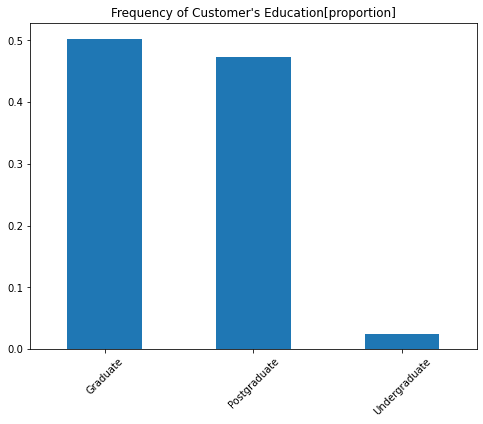

In [17]:
df['Education'].value_counts(normalize=True).plot.bar(figsize=(8,6))
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Education[proportion]");

In [18]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
df['Marital_Status'] = df['Marital_Status'].replace({"Together":"Married",
                                                    "Divorced":"Single",
                                                    "Widow":"Single",
                                                    "Alone":"Single",
                                                    "Absurd":"Single",
                                                    "YOLO":"Single"})

In [21]:
fig = px.bar(
    df["Marital_Status"].value_counts(normalize=True),
    title="Proportion of Customer's Marital Status",
    height =500
)
fig.update_layout(yaxis_title="Frequency")
fig.show()

## Income

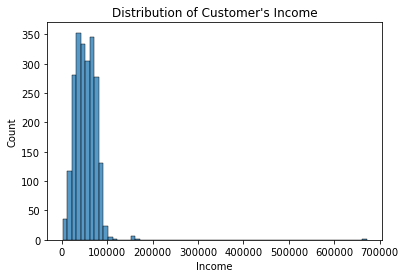

In [22]:
sns.histplot(data=df,x="Income", binwidth=1e4)
plt.title("Distribution of Customer's Income");